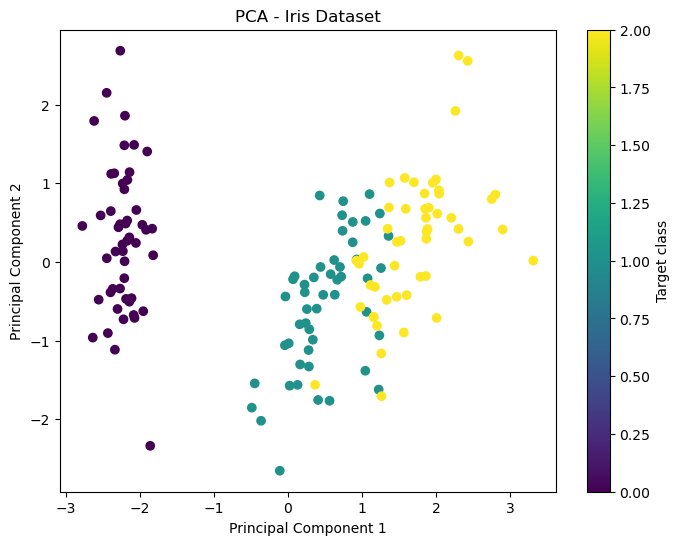

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


iris = load_iris()
x = iris.data
y = iris.target


sc = StandardScaler()
x = sc.fit_transform(x)


pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target class')
plt.show()


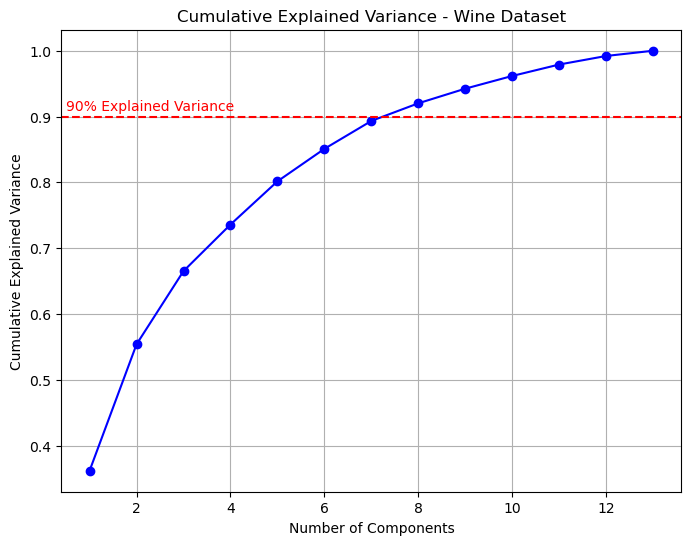

Number of components required to capture at least 90% of the variance: 8


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


ds = pd.read_csv('C:\\Users\\2022503013\\Downloads\\Wine.csv')
x = ds.iloc[:,0:13].values


sc = StandardScaler()
x = sc.fit_transform(x)


pca = PCA()
x_pca = pca.fit_transform(x)


explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='b')
plt.title("Cumulative Explained Variance - Wine Dataset")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(0.5, 0.91, '90% Explained Variance', color='r')
plt.grid(True)
plt.show()


num_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of components required to capture at least 90% of the variance: {num_components}")


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


cancer = load_breast_cancer()
x = cancer.data
y = cancer.target


sc = StandardScaler()
x = sc.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


pca = PCA(n_components=5) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


clf_pca = LogisticRegression(random_state=0)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca = clf_pca.predict(x_test_pca)


accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of Logistic Regression on PCA-transformed data: {accuracy_pca * 100:.2f}%")


clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


accuracy_no_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression without PCA: {accuracy_no_pca * 100:.2f}%")


Accuracy of Logistic Regression on PCA-transformed data: 95.61%
Accuracy of Logistic Regression without PCA: 96.49%
